# DSCI 552-HW5
## Yehao Fu 1025391347

In [556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import _tree
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale 
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 

1. Decision Trees as Interpretable Models

(a) Download the Accute Inflamations data from https://archive.ics.uci.edu/
ml/datasets/Acute+Inflammations.

(b) Build a decision tree on the whole data set and plot it

In [557]:
col_names=['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing (continuous need for urination)','Micturition pains','Burning of urethra, itch, swelling of urethra outlet','decision: Inflammation of urinary bladder','decision: Nephritis of renal pelvis origin']
df1=pd.read_csv('diagnosis.csv',names=col_names)
df1

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing (continuous need for urination),Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [558]:
train_x=df1.iloc[:,:6]
train_y=df1.iloc[:,6:]
number=LabelEncoder()
train_x['Occurrence of nausea']=number.fit_transform(train_x['Occurrence of nausea'].astype('str'))
train_x['Lumbar pain']=number.fit_transform(train_x['Lumbar pain'].astype('str'))
train_x['Urine pushing (continuous need for urination)']=number.fit_transform(train_x['Urine pushing (continuous need for urination)'].astype('str'))
train_x['Micturition pains']=number.fit_transform(train_x['Micturition pains'].astype('str'))
train_x['Burning of urethra, itch, swelling of urethra outlet']=number.fit_transform(train_x['Burning of urethra, itch, swelling of urethra outlet'].astype('str'))
train_y['decision: Inflammation of urinary bladder']=number.fit_transform(train_y['decision: Inflammation of urinary bladder'].astype('str'))
train_y['decision: Nephritis of renal pelvis origin']=number.fit_transform(train_y['decision: Nephritis of renal pelvis origin'].astype('str'))

In [559]:
dt=DecisionTreeClassifier(criterion='entropy')
decision=dt.fit(train_x,train_y)

[Text(0.4, 0.9, 'X[0] <= 37.95\nentropy = 0.99\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'X[3] <= 0.5\nentropy = 0.459\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'X[2] <= 0.5\nentropy = 0.775\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'X[1] <= 0.5\nentropy = 0.479\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\nentropy = 0.465\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

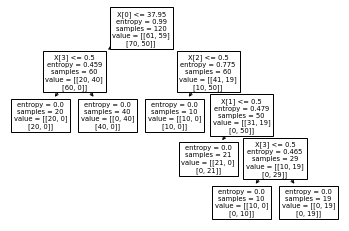

In [560]:
tree.plot_tree(decision)

In [561]:
from sklearn.tree import export_text
picture=export_text(decision)
print (picture)

|--- feature_0 <= 37.95
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0



In [562]:
names=['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing (continuous need for urination)','Micturition pains','Burning of urethra, itch, swelling of urethra outlet']
#dotfile=open('.dot','w')
#tree.export_graphviz(dt,out_file=dotfile,feature_names=names)
#dotfile.close()

(c) Convert the decision rules into a set of IF-THEN rules.

In [563]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)

In [564]:
tree_to_code(dt,names)

def tree(Temperature of patient, Occurrence of nausea, Lumbar pain, Urine pushing (continuous need for urination), Micturition pains, Burning of urethra, itch, swelling of urethra outlet):
  if Temperature of patient <= 37.95000076293945:
    if Urine pushing (continuous need for urination) <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if Urine pushing (continuous need for urination) > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if Temperature of patient > 37.95000076293945
    if Lumbar pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar pain > 0.5
      if Occurrence of nausea <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Occurrence of nausea > 0.5
        if Urine pushing (continuous need for urination) <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine pushing (continuous need for urination) > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision
rules with high interpretability.

In [565]:
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.3,random_state=0)

In [566]:
# https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/
cpp=dt.cost_complexity_pruning_path(x_train,y_train)
alphas=cpp['ccp_alphas']
alphas

array([0.        , 0.10866401, 0.17563183, 0.2354954 , 0.36621652])

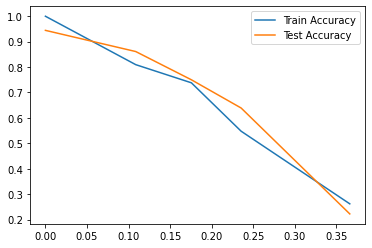

The best alpha is: 0.00


In [567]:
trainerror=[]
testerror=[]
for i in range(0,5):
    dt2=DecisionTreeClassifier(ccp_alpha=alphas[i],criterion='entropy')
    dt2.fit(x_train,y_train)
    x_train_prediction=dt2.predict(x_train)
    #train_score=cross_val_score(dt2,x_train,y_train,cv=5)
    train_score=accuracy_score(y_train,x_train_prediction)
    trainerror.append(train_score.mean())
    x_test_prediction=dt2.predict(x_test)
    test_score=accuracy_score(y_test,x_test_prediction)
    testerror.append(test_score.mean())
sns.lineplot(x=alphas,y=trainerror,label="Train Accuracy")
sns.lineplot(x=alphas,y=testerror,label="Test Accuracy")
plt.show()
print('The best alpha is: 0.00')

[Text(0.4, 0.9, 'X[0] <= 38.0\nentropy = 0.995\nsamples = 84\nvalue = [[43, 41]\n[47, 37]]'),
 Text(0.2, 0.7, 'X[2] <= 0.5\nentropy = 0.482\nsamples = 41\nvalue = [[16, 25]\n[41, 0]]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 25\nvalue = [[0, 25]\n[25, 0]]'),
 Text(0.3, 0.5, 'entropy = 0.0\nsamples = 16\nvalue = [[16, 0]\n[16, 0]]'),
 Text(0.6, 0.7, 'X[2] <= 0.5\nentropy = 0.768\nsamples = 43\nvalue = [[27, 16]\n[6, 37]]'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 6\nvalue = [[6, 0]\n[6, 0]]'),
 Text(0.7, 0.5, 'X[1] <= 0.5\nentropy = 0.493\nsamples = 37\nvalue = [[21, 16]\n[0, 37]]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 13\nvalue = [[13, 0]\n[0, 13]]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\nentropy = 0.459\nsamples = 24\nvalue = [[8, 16]\n[0, 24]]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 8\nvalue = [[8, 0]\n[0, 8]]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 16\nvalue = [[0, 16]\n[0, 16]]')]

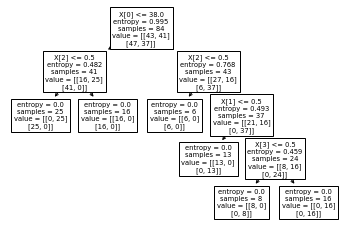

In [568]:
dt2=DecisionTreeClassifier(ccp_alpha=0.00,criterion='entropy')
decision2=dt2.fit(x_train,y_train)
tree.plot_tree(decision2)

In [569]:
tree_to_code(dt2,names)

def tree(Temperature of patient, Occurrence of nausea, Lumbar pain, Urine pushing (continuous need for urination), Micturition pains, Burning of urethra, itch, swelling of urethra outlet):
  if Temperature of patient <= 38.0:
    if Lumbar pain <= 0.5:
      return [[ 0. 25.]
 [25.  0.]]
    else:  # if Lumbar pain > 0.5
      return [[16.  0.]
 [16.  0.]]
  else:  # if Temperature of patient > 38.0
    if Lumbar pain <= 0.5:
      return [[6. 0.]
 [6. 0.]]
    else:  # if Lumbar pain > 0.5
      if Occurrence of nausea <= 0.5:
        return [[13.  0.]
 [ 0. 13.]]
      else:  # if Occurrence of nausea > 0.5
        if Urine pushing (continuous need for urination) <= 0.5:
          return [[8. 0.]
 [0. 8.]]
        else:  # if Urine pushing (continuous need for urination) > 0.5
          return [[ 0. 16.]
 [ 0. 16.]]


2. The LASSO and Boosting for Regression
(a) Download the Communities and Crime data3
from https://archive.ics.uci.
edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as
the training set and the rest as the test set.

In [580]:
file=open('communities1.txt')
col_names2=[]
for line in file:
    list=line.split(' ')
    col_names2.append(list[1])
df2=pd.read_csv('communities.csv',header=None)
df2.columns=col_names2

In [581]:
df2

,state,county,community,communityname\n,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [582]:
trainset=df2.iloc[:1495,:]
testset=df2.iloc[1495:,:]

In [583]:
trainset

,state,county,community,communityname\n,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,6,?,?,Hillsboroughtown,8,0.00,0.59,0.01,0.69,1.00,...,0.02,0.14,0.22,?,?,?,?,0.00,?,0.03
1491,6,?,?,Orangecity,8,0.16,0.62,0.03,0.74,0.48,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,13,?,?,Waycrosscity,8,0.01,0.36,0.95,0.24,0.03,...,0.03,0.12,0.01,?,?,?,?,0.00,?,0.30
1493,39,85,49056,Mentorcity,8,0.06,0.53,0.01,0.98,0.05,...,0.08,0.15,0.02,?,?,?,?,0.00,?,0.03


(b) The data set has missing values. Use a data imputation technique to deal with
the missing values in the data set. The data description mentions some features
are nonpredictive. Ignore those features.

In [584]:
testset_im=testset.iloc[:,5:]
testset_im=testset_im.replace('?','NaN')
trainset_im=trainset.iloc[:,5:]
trainset_im=trainset_im.replace('?','NaN')

In [585]:
trainset_im

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [586]:
col_names3=col_names2[5:]
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
imp.fit(trainset_im)
trainset_im_transformed=imp.transform(trainset_im)
trainset_im_transformed=pd.DataFrame(trainset_im_transformed)
trainset_im_transformed.columns=col_names3
trainset_im_transformed

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000,0.20
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.30
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753,0.03


In [587]:
imp.fit(testset_im)
testset_im_transformed=imp.transform(testset_im)
testset_im_transformed=pd.DataFrame(testset_im_transformed)
testset_im_transformed.columns=col_names3
testset_im_transformed

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.00,0.20,0.03,0.91,0.23,0.05,0.15,0.19,0.09,0.42,...,0.01,0.23,0.73,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.12
1,0.00,0.55,0.13,0.78,0.15,0.36,0.48,0.53,0.30,0.10,...,0.01,0.18,0.02,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.11
2,0.00,0.52,0.04,0.59,0.05,0.62,0.84,0.78,0.75,0.43,...,0.01,0.18,0.00,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.12
3,0.04,0.51,0.07,0.92,0.09,0.03,0.38,0.47,0.27,0.35,...,0.06,0.13,0.16,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.06
4,0.03,0.59,0.20,0.75,0.19,0.10,0.38,0.62,0.35,0.11,...,0.03,0.23,0.06,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,...,0.01,0.28,0.05,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.09
495,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,0.73,0.14,...,0.02,0.37,0.20,0.1605,0.065375,0.655375,0.40625,0.00,0.208,0.45
496,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,0.31,0.54,...,0.08,0.32,0.18,0.0800,0.060000,0.780000,0.00000,0.91,0.280,0.23
497,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,0.63,0.41,...,0.03,0.38,0.33,0.0200,0.020000,0.790000,0.00000,0.22,0.180,0.19


(c) Plot a correlation matrix for the features in the data set.

In [588]:
trainset_im_features=trainset_im_transformed.iloc[:,:122]
trainset_im_features

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.323598,0.02,0.12,0.45,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.323598,0.01,0.21,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.323598,0.02,0.39,0.28,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.323598,0.04,0.09,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,0.323598,0.02,0.14,0.22,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.380000,0.07,0.40,0.14,0.070000,0.050000,0.850000,0.500000,0.61,0.190000
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,0.323598,0.03,0.12,0.01,0.163975,0.080502,0.713054,0.451883,0.00,0.190753
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,0.323598,0.08,0.15,0.02,0.163975,0.080502,0.713054,0.451883,0.00,0.190753


In [589]:
corr_matrix_train=trainset_im_features.corr()
corr_matrix_train

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
population,1.000000,-0.040404,0.242144,-0.306023,0.168868,0.162282,0.014554,0.128721,0.075744,-0.107060,...,0.125115,0.747424,0.235510,0.283682,0.630778,0.591778,-0.063029,0.041216,0.464459,-0.011305
householdsize,-0.040404,1.000000,-0.068374,-0.243565,0.209848,0.473320,0.517742,0.371658,0.301949,-0.606714,...,0.031750,-0.020832,-0.003807,-0.030652,-0.014900,0.004813,-0.024445,0.008771,-0.086315,-0.021276
racepctblack,0.242144,-0.068374,1.000000,-0.793431,-0.104912,-0.069449,0.118272,0.143406,0.125330,0.056381,...,-0.069725,0.155017,0.101270,0.169002,0.142543,0.104193,-0.113466,0.022226,0.257781,0.042346
racePctWhite,-0.306023,-0.243565,-0.793431,1.000000,-0.270829,-0.436737,-0.189135,-0.258390,-0.175195,0.138619,...,-0.017046,-0.147054,-0.339787,-0.234460,-0.131432,-0.126551,0.077626,-0.048890,-0.272366,-0.029339
racePctAsian,0.168868,0.209848,-0.104912,-0.270829,1.000000,0.264600,-0.017945,0.106958,0.056442,-0.283709,...,0.153146,0.004790,0.360708,0.274826,-0.023657,0.044584,0.031598,0.050863,0.100653,-0.004045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PolicOperBudg,0.591778,0.004813,0.104193,-0.126551,0.044584,0.071164,-0.009618,0.017201,0.002304,-0.031643,...,0.104500,0.429176,0.138857,0.180796,0.836614,1.000000,-0.070216,-0.013583,-0.068059,0.297196
LemasPctPolicOnPatr,-0.063029,-0.024445,-0.113466,0.077626,0.031598,0.018398,-0.025210,-0.008902,-0.006311,0.021422,...,0.017528,-0.067853,0.068739,0.028476,-0.118489,-0.070216,1.000000,-0.033617,0.032430,-0.187790
LemasGangUnitDeploy,0.041216,0.008771,0.022226,-0.048890,0.050863,0.048441,0.035629,0.016274,0.015603,-0.034216,...,0.123336,0.070956,-0.071059,-0.084771,0.008831,-0.013583,-0.033617,1.000000,-0.017356,-0.040769
LemasPctOfficDrugUn,0.464459,-0.086315,0.257781,-0.272366,0.100653,0.126210,0.012529,0.117998,0.083582,-0.022575,...,-0.013820,0.322885,0.236545,0.209710,-0.058210,-0.068059,0.032430,-0.017356,1.000000,0.017402


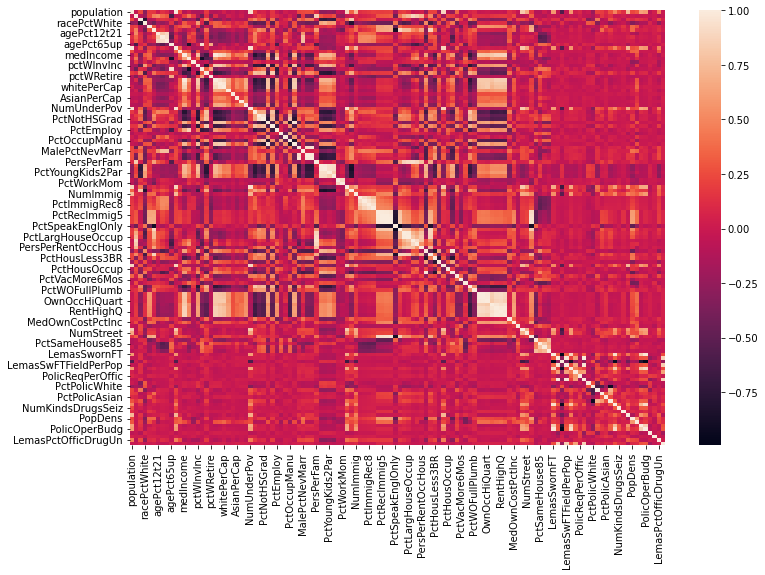

In [590]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_train)
plt.show()

In [591]:
testset_im_features=testset_im_transformed.iloc[:,:122]
corr_matrix_test=testset_im_features.corr()
corr_matrix_test

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
population,1.000000,-0.065386,0.192372,-0.282014,0.225467,0.135724,-0.021150,0.137412,0.075623,-0.089080,...,0.067718,0.631997,0.221436,0.224299,0.526594,0.623973,-0.072339,0.196838,0.476892,-0.099962
householdsize,-0.065386,1.000000,-0.063024,-0.211763,0.178287,0.455058,0.528305,0.353382,0.273764,-0.630803,...,0.049596,-0.001062,-0.004324,-0.115132,-0.093438,-0.061176,0.043286,-0.029052,-0.118520,-0.139306
racepctblack,0.192372,-0.063024,1.000000,-0.797841,-0.112666,-0.057375,0.135763,0.185757,0.162801,0.042668,...,0.016926,0.137356,0.075896,0.075104,0.048886,-0.009182,0.000467,-0.027499,0.270904,-0.029119
racePctWhite,-0.282014,-0.211763,-0.797841,1.000000,-0.269080,-0.469192,-0.211022,-0.295678,-0.213033,0.132769,...,-0.065571,-0.089695,-0.331156,-0.152462,-0.028083,-0.063401,-0.013672,0.021780,-0.289850,0.053788
racePctAsian,0.225467,0.178287,-0.112666,-0.269080,1.000000,0.273361,-0.046675,0.082269,0.041410,-0.240209,...,0.059584,-0.016477,0.475941,0.365812,0.000812,0.168671,0.032957,0.110697,0.105520,-0.029627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PolicOperBudg,0.623973,-0.061176,-0.009182,-0.063401,0.168671,0.014743,-0.051737,-0.000621,-0.012490,-0.009418,...,0.145827,0.328457,0.100994,0.131769,0.660224,1.000000,-0.202747,0.177668,-0.041723,0.168954
LemasPctPolicOnPatr,-0.072339,0.043286,0.000467,-0.013672,0.032957,0.039469,0.075286,0.082679,0.077752,-0.037535,...,-0.044424,-0.073198,0.012864,-0.003481,-0.114533,-0.202747,1.000000,0.101500,-0.002475,-0.336854
LemasGangUnitDeploy,0.196838,-0.029052,-0.027499,0.021780,0.110697,-0.047469,-0.065781,-0.025516,-0.051545,-0.070318,...,0.028963,0.217342,-0.099113,-0.083958,0.324713,0.177668,0.101500,1.000000,-0.008386,0.037666
LemasPctOfficDrugUn,0.476892,-0.118520,0.270904,-0.289850,0.105520,0.123135,-0.032246,0.114954,0.081947,0.025172,...,-0.077422,0.241661,0.204302,0.198704,-0.033726,-0.041723,-0.002475,-0.008386,1.000000,0.019959


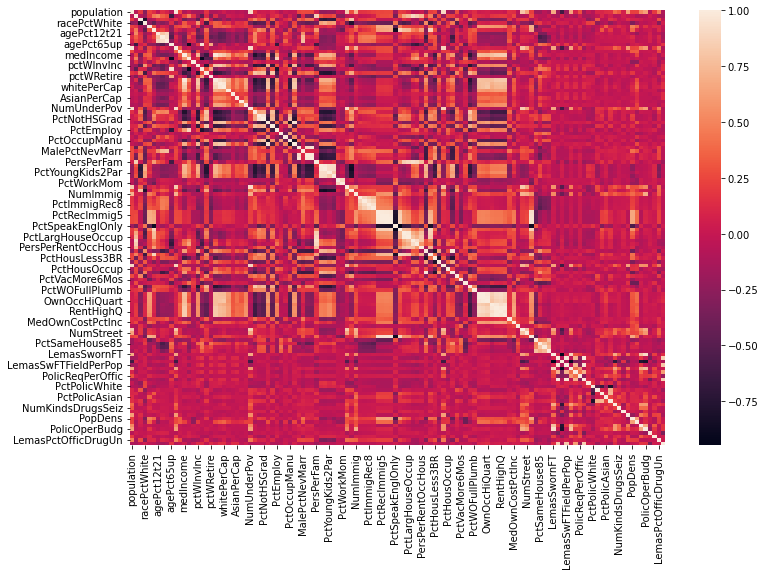

In [592]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix_test)
plt.show()

(d) Calculate the Coefficient of Variation CV for each feature, where CV = sm
, in
which s is sample standard deviation and m is sample mean..

In [593]:
std_train=trainset_im_features.std()
mean_train=trainset_im_features.mean()
CV_train=std_train/mean_train
CV_train

population             2.241105
householdsize          0.355800
racepctblack           1.428885
racePctWhite           0.330213
racePctAsian           1.359100
                         ...   
PolicOperBudg          0.743487
LemasPctPolicOnPatr    0.115739
LemasGangUnitDeploy    0.362989
LemasPctOfficDrugUn    2.552946
PolicBudgPerPop        0.326026
Length: 122, dtype: float64

In [594]:
std_test=testset_im_features.std()
mean_test=testset_im_features.mean()
CV_test=std_test/mean_test
CV_test

population             2.077145
householdsize          0.346017
racepctblack           1.356525
racePctWhite           0.304182
racePctAsian           1.360714
                         ...   
PolicOperBudg          0.645044
LemasPctPolicOnPatr    0.139802
LemasGangUnitDeploy    0.382850
LemasPctOfficDrugUn    2.563248
PolicBudgPerPop        0.362543
Length: 122, dtype: float64

(e) Pick b√
128c features with highest CV , and make scatter plots and box plots for
them. Can you draw conclusions about significance of those features, just by the
scatter plots?

In [595]:
CV_train_sorted=CV_train.sort_values(ascending=False)
CV_train_sorted

NumStreet              4.292923
NumInShelters          3.470952
NumIlleg               3.058964
NumImmig               2.926635
LemasPctOfficDrugUn    2.552946
                         ...   
NumKindsDrugsSeiz      0.144382
RacialMatchCommPol     0.134853
PctPolicWhite          0.122813
LemasPctPolicOnPatr    0.115739
LemasSwFTFieldOps      0.064288
Length: 122, dtype: float64

In [596]:
128**0.5

11.313708498984761

In [597]:
CV_train_new=CV_train_sorted.iloc[:11]
CV_train_new=pd.DataFrame(CV_train_new)
CV_train_new

,0
NumStreet,4.292923
NumInShelters,3.470952
NumIlleg,3.058964
NumImmig,2.926635
LemasPctOfficDrugUn,2.552946
NumUnderPov,2.342443
population,2.241105
numbUrban,2.038461
HousVacant,1.968467
LandArea,1.645408


In [598]:
col_names4=['NumStreet','NumInShelters','NumIlleg','NumImmig','LemasPctOfficDrugUn','NumUnderPov','population','numbUrban','HousVacant','LandArea','racePctHisp']
data_train_plot=trainset_im_features[col_names4]
data_train_plot.reset_index(inplace=True)
data_train_plot.drop(['index'],inplace=True,axis=1)
data_train_plot

/var/folders/jm/r_1w06w93tg7pbnspg81pcrh0000gn/T/ipykernel_26672/1778691367.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train_plot.drop(['index'],inplace=True,axis=1)


,NumStreet,NumInShelters,NumIlleg,NumImmig,LemasPctOfficDrugUn,NumUnderPov,population,numbUrban,HousVacant,LandArea,racePctHisp
0,0.00,0.04,0.04,0.03,0.32,0.08,0.19,0.20,0.21,0.12,0.17
1,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.02,0.07
2,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.04
3,0.00,0.00,0.03,0.02,0.00,0.01,0.04,0.06,0.01,0.02,0.10
4,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.04,0.05
...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.01,0.02,0.07
1491,0.03,0.09,0.04,0.15,0.61,0.08,0.16,0.18,0.06,0.07,0.42
1492,0.00,0.00,0.03,0.00,0.00,0.04,0.01,0.00,0.05,0.03,0.01
1493,0.00,0.00,0.00,0.01,0.00,0.01,0.06,0.07,0.02,0.08,0.01


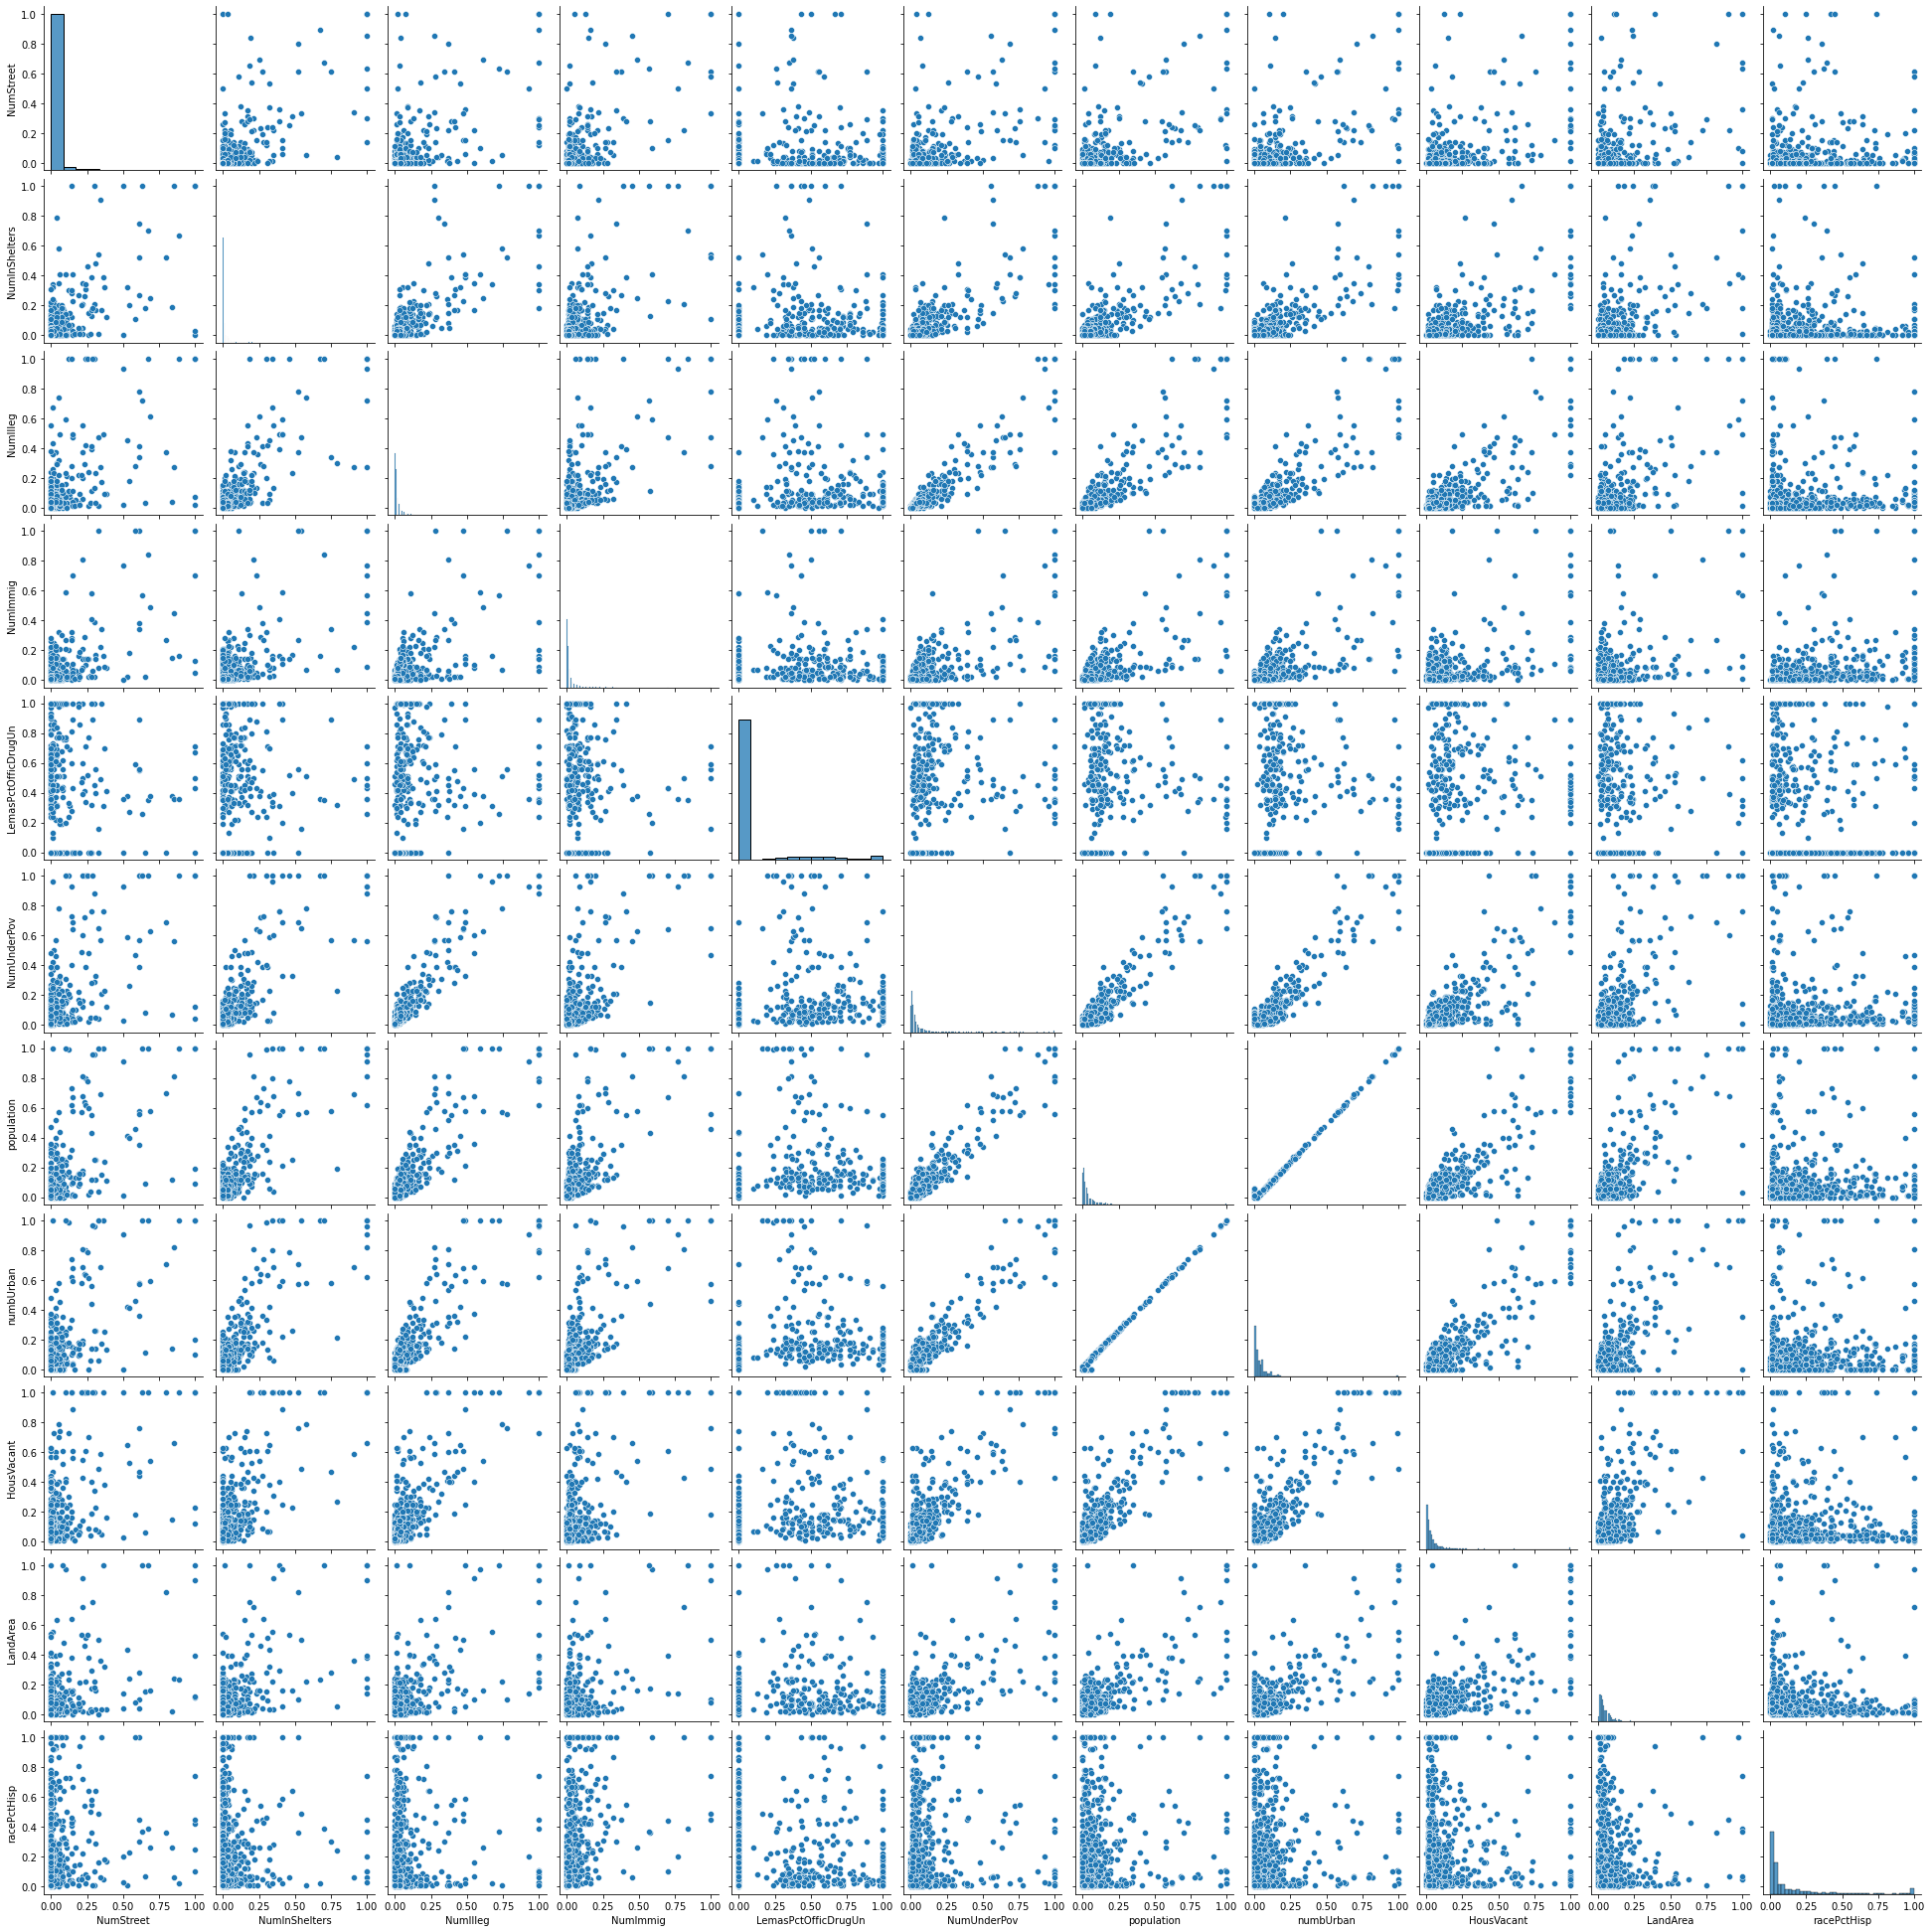

In [599]:
sns.pairplot(data_train_plot)

<AxesSubplot:>

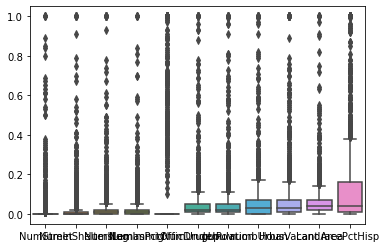

In [489]:
sns.boxplot(data=data_train_plot)

In [490]:
CV_test_sorted=CV_test.sort_values(ascending=False)
CV_test_sorted

NumStreet              4.761102
NumInShelters          3.533439
NumImmig               2.803986
NumIlleg               2.729758
LemasPctOfficDrugUn    2.563248
                         ...   
NumKindsDrugsSeiz      0.150118
LemasPctPolicOnPatr    0.139802
RacialMatchCommPol     0.120686
PctPolicWhite          0.118276
LemasSwFTFieldOps      0.026740
Length: 122, dtype: float64

In [491]:
CV_test_new=CV_test_sorted.iloc[:11]
CV_test_new=pd.DataFrame(CV_test_new)
CV_test_new

,0
NumStreet,4.761102
NumInShelters,3.533439
NumImmig,2.803986
NumIlleg,2.729758
LemasPctOfficDrugUn,2.563248
NumUnderPov,2.153037
population,2.077145
HousVacant,1.932141
numbUrban,1.879227
LandArea,1.758711


In [492]:
col_names5=['NumStreet','NumInShelters','NumImmig','NumIlleg','LemasPctOfficDrugUn','NumUnderPov','population','HousVacant','numbUrban','LandArea','racePctHisp']
data_test_plot=testset_im_features[col_names5]
data_test_plot.reset_index(inplace=True)
data_test_plot.drop(['index'],inplace=True,axis=1)
data_test_plot

/var/folders/jm/r_1w06w93tg7pbnspg81pcrh0000gn/T/ipykernel_26672/2112630558.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test_plot.drop(['index'],inplace=True,axis=1)


,NumStreet,NumInShelters,NumImmig,NumIlleg,LemasPctOfficDrugUn,NumUnderPov,population,HousVacant,numbUrban,LandArea,racePctHisp
0,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.05
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.36
2,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.02,0.00,0.01,0.62
3,0.00,0.00,0.01,0.01,0.00,0.01,0.04,0.04,0.06,0.06,0.03
4,0.00,0.00,0.01,0.01,0.00,0.01,0.03,0.04,0.04,0.03,0.10
...,...,...,...,...,...,...,...,...,...,...,...
494,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.02,0.03,0.01,0.16
495,0.00,0.01,0.05,0.03,0.00,0.04,0.05,0.03,0.06,0.02,0.32
496,0.02,0.06,0.06,0.13,0.91,0.12,0.16,0.21,0.17,0.08,0.25
497,0.01,0.04,0.06,0.02,0.22,0.03,0.08,0.05,0.09,0.03,0.10


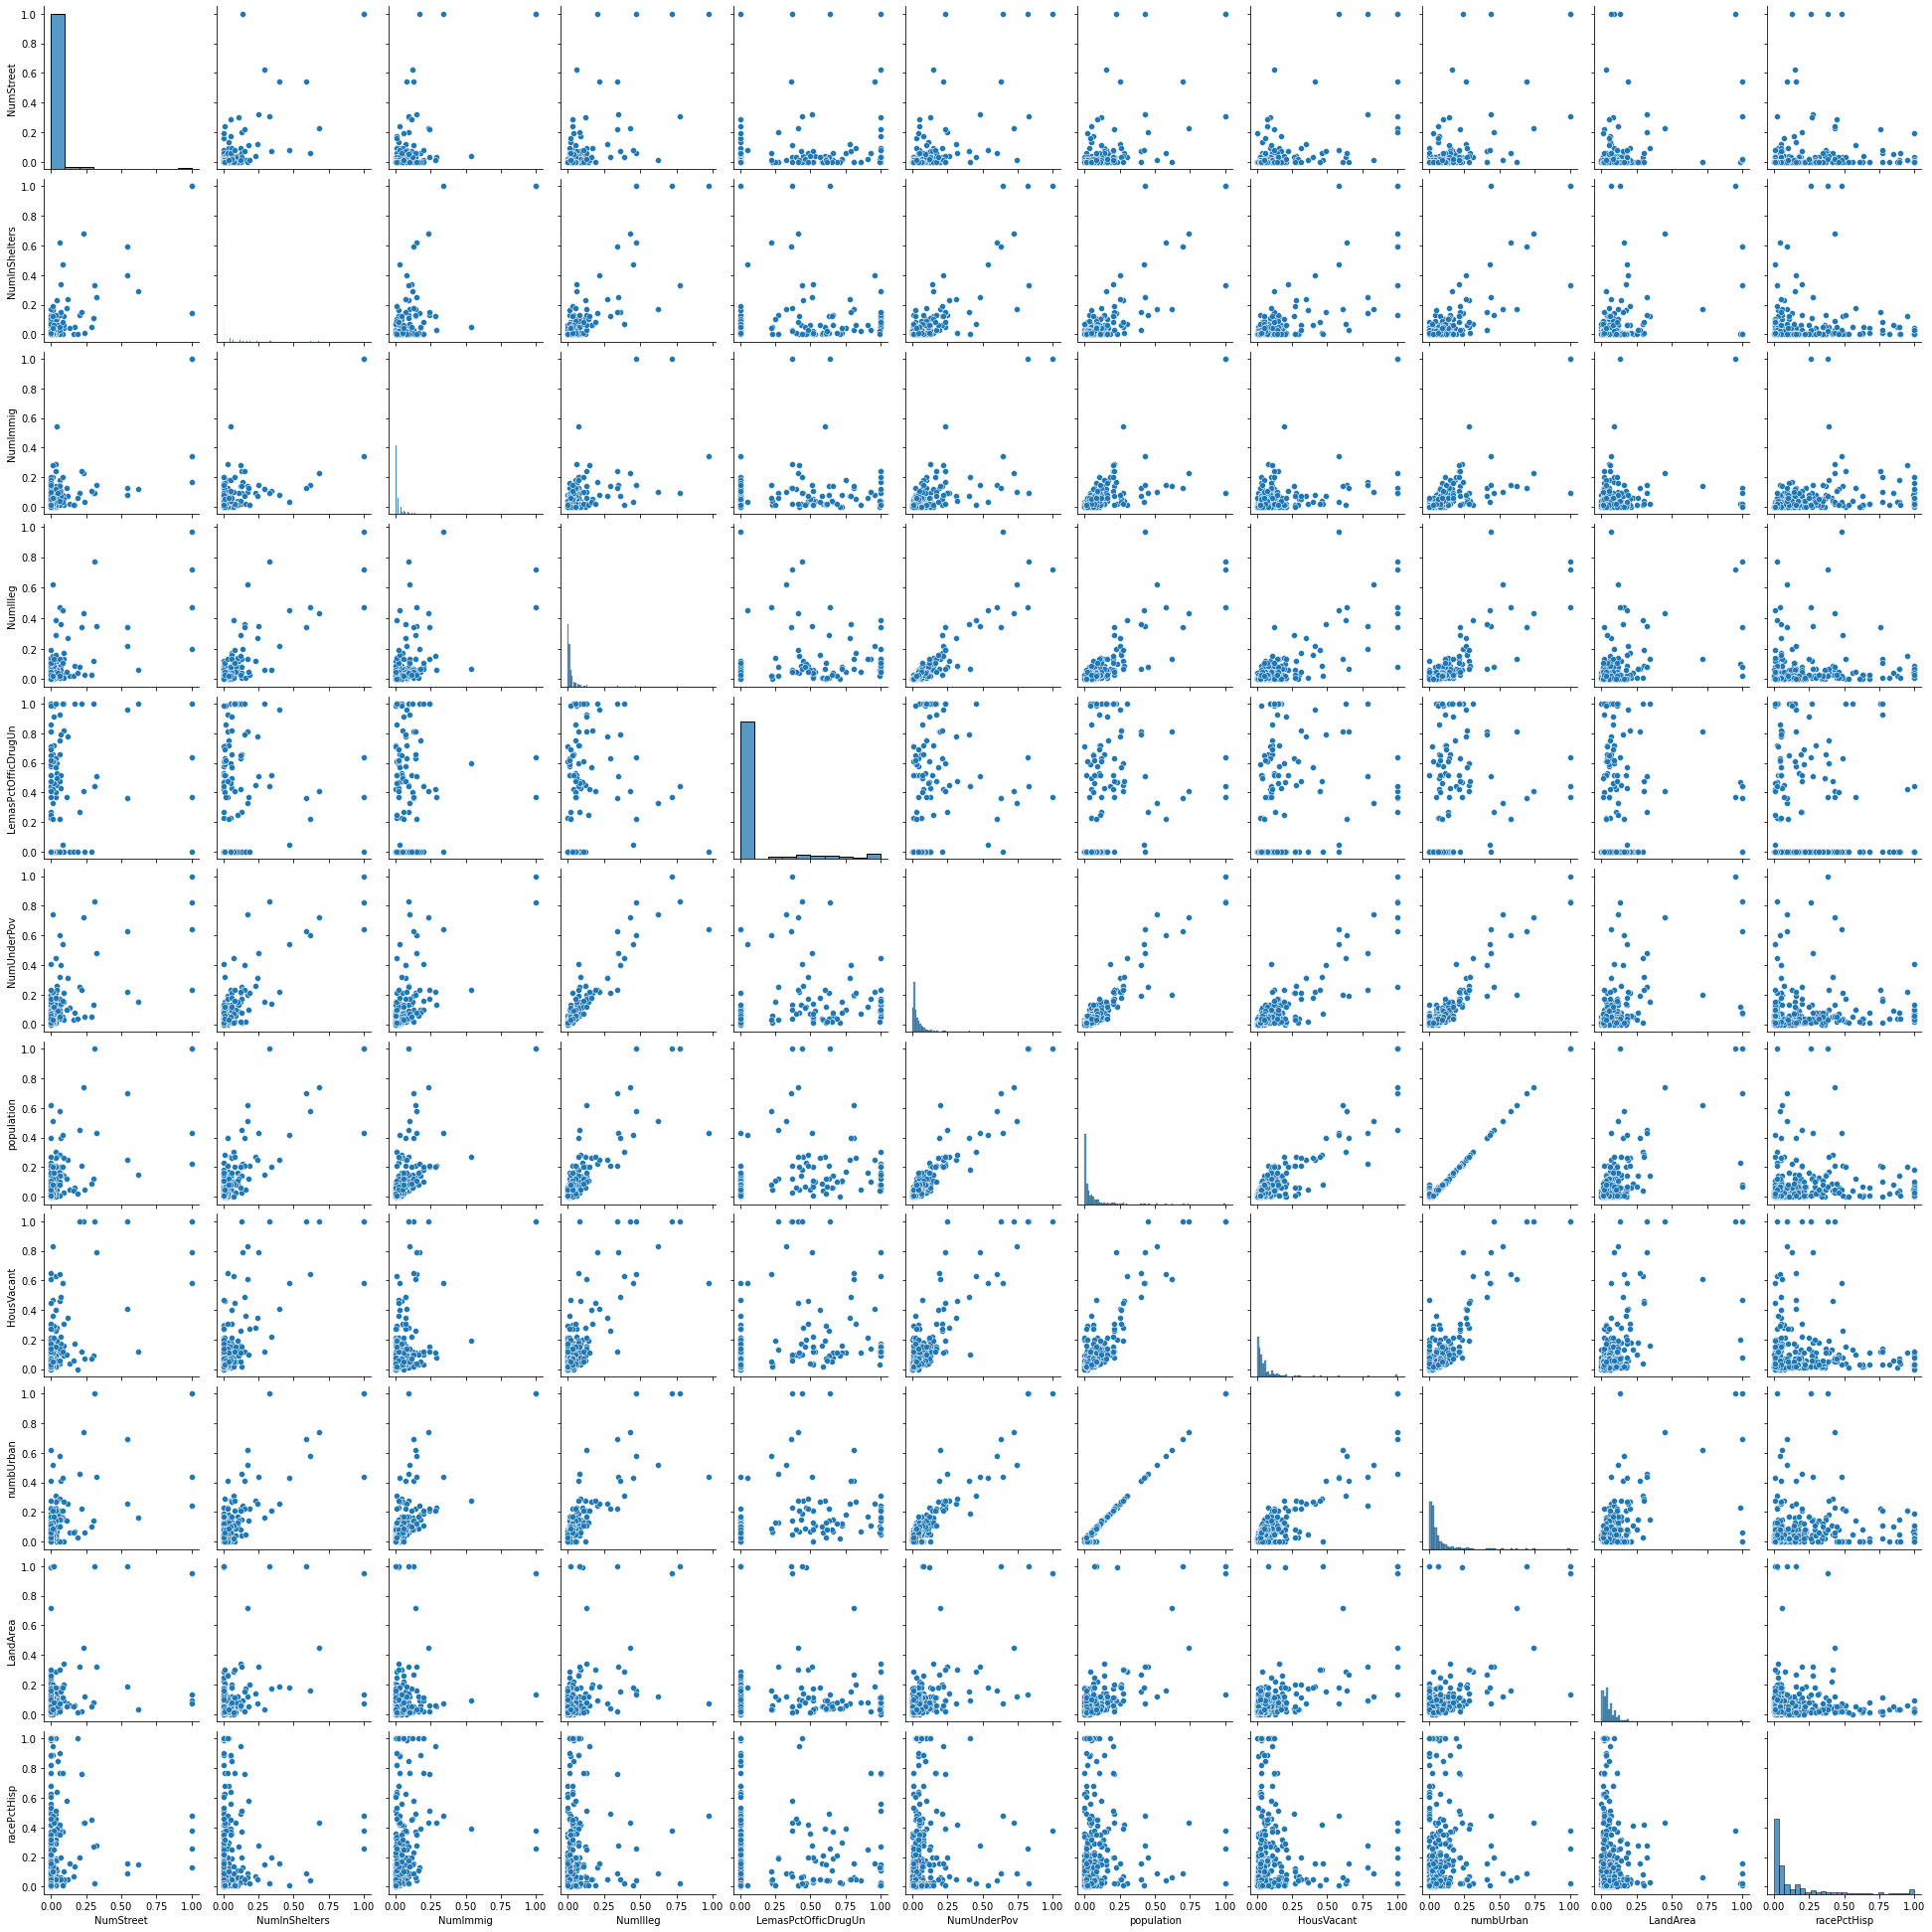

In [493]:
sns.pairplot(data_test_plot)

<AxesSubplot:>

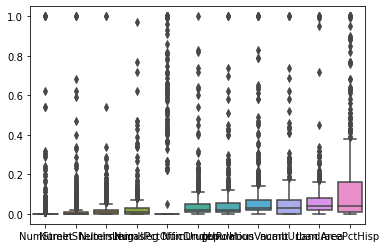

In [494]:
sns.boxplot(data=data_test_plot)

I cannot draw conclusions about significance of those features just by the scatter plots. Further methods are needed. We can use p-values to decide the significance of those features through regression models.

(f) Fit a linear model using least squares to the training set and report the test error.

In [495]:
train_x=trainset_im_transformed.iloc[:,:-1]
train_y=trainset_im_transformed.iloc[:,-1]
test_x=testset_im_transformed.iloc[:,:-1]
test_y=testset_im_transformed.iloc[:,-1]

In [496]:
train_constant=sm.add_constant(train_x)
model=sm.OLS(train_y,train_constant).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.711
Model:                             OLS   Adj. R-squared:                  0.686
Method:                  Least Squares   F-statistic:                     27.94
Date:                 Wed, 29 Jun 2022   Prob (F-statistic):          6.56e-291
Time:                         18:40:40   Log-Likelihood:                 955.40
No. Observations:                 1495   AIC:                            -1667.
Df Residuals:                     1373   BIC:                            -1019.
Df Model:                          121                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [497]:
test_constant=sm.add_constant(test_x)
prediction=model.predict(test_constant)
testerror=mean_squared_error(test_y,prediction)
print('The test error is:',testerror)

The test error is: 0.018112462026533386


(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation.
Report the test error obtained.

In [498]:
model2=RidgeCV(alphas=[1e-3,1e-2,1e-1,1]).fit(train_x,train_y)
prediction2=model2.predict(test_x)
testerror2=mean_squared_error(test_y,prediction2)
print('The test error is:',testerror2)

The test error is: 0.017723737122826985


/Users/yehaofu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)


(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report
the test error obtained, along with a list of the variables selected by the model.
Repeat with standardized4
features. Report the test error for both cases and
compare them.

In [499]:
model3=LassoCV(alphas=[1e-3,1e-2,1e-1,1]).fit(train_x,train_y)
preidction3=model3.predict(test_x)
testerror3=mean_squared_error(test_y,preidction3)
print('The test error is:',testerror3)

The test error is: 0.017534463993660966


In [500]:
coefficient=model3.coef_
coefficient

array([ 0.        , -0.        ,  0.21106187, -0.01111143,  0.        ,
        0.        , -0.        , -0.00593545, -0.        ,  0.        ,
        0.        ,  0.03825435,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.0290413 , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        ,  0.01007795,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.14524078, -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.21523141,
       -0.00699671, -0.        , -0.        , -0.04936435,  0.        ,
        0.15737504,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.0029251 ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.15526152,  0.  

In [501]:
index=np.where(model3.coef_!=0)
feature_selected=pd.DataFrame(train_x.columns[index])
value_selected=pd.DataFrame(coefficient[index])
summary=pd.concat([feature_selected,value_selected],axis=1)
summary.columns=['Feature','Value']
summary

,Feature,Value
0,racepctblack,0.211062
1,racePctWhite,-0.011111
2,agePct12t29,-0.005935
3,pctUrban,0.038254
4,pctWPubAsst,0.029041
5,AsianPerCap,0.010078
6,MalePctDivorce,0.145241
7,PctKids2Par,-0.215231
8,PctYoungKids2Par,-0.006997
9,PctWorkMom,-0.049364


In [502]:
scaler=StandardScaler()
train_x_standized=pd.DataFrame(scaler.fit_transform(train_x))
test_x_standized=pd.DataFrame(scaler.fit_transform(test_x))

In [503]:
model4=LassoCV(alphas=[1e-3,1e-2,1e-1,1]).fit(train_x_standized,train_y)
preidction4=model4.predict(test_x_standized)
testerror4=mean_squared_error(test_y,preidction4)
print('The test error is:',testerror4)

The test error is: 0.0179550520850434


In [504]:
coefficient2=model4.coef_
coefficient2

array([-0.00000000e+00,  0.00000000e+00,  6.68051283e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  5.26467733e-03, -2.85717109e-02,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  1.56601172e-02,
        0.00000000e+00, -8.79325925e-03,  2.91177503e-03, -1.81093057e-02,
        6.82362963e-03,  3.51449935e-03, -1.56813674e-02,  0.00000000e+00,
       -0.00000000e+00, -4.08897864e-03, -3.12694612e-03, -4.99334922e-03,
        4.85727411e-03,  3.44515574e-03,  3.11627664e-03, -0.00000000e+00,
       -2.09841083e-02, -1.74714543e-04,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.43499343e-02, -1.94041052e-04,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.50613573e-02,  1.50872492e-02,
       -2.42927456e-03, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -3.96442326e-02, -8.81759216e-03, -5.69203647e-04, -0.00000000e+00,
       -1.92239405e-02, -1.55718889e-03,  2.55437098e-02, -6.41109750e-03,
       -0.00000000e+00, -

In [505]:
index2=np.where(model4.coef_!=0)
feature_selected2=pd.DataFrame(train_x.columns[index2])
value_selected2=pd.DataFrame(coefficient2[index2])
summary2=pd.concat([feature_selected2,value_selected2],axis=1)
summary2.columns=['Feature','Value']
summary2

,Feature,Value
0,racepctblack,0.066805
1,agePct12t21,0.005265
2,agePct12t29,-0.028572
3,pctUrban,0.015660
4,pctWWage,-0.008793
...,...,...
63,PopDens,0.002540
64,PctUsePubTrans,-0.007038
65,PolicCars,0.002432
66,LemasPctPolicOnPatr,0.002066


The test error of the regular LASSO model is 0.01753, the test error of the LASSO model with standardized features is 0.01796. The test error become larger when the features are standardized.

(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [506]:
df2_im=pd.concat([trainset_im_transformed,testset_im_transformed])
df2_im_x=df2_im.iloc[:,:-1]
df2_im_y=df2_im.iloc[:,-1]

In [507]:
# I learned this method which is find M through PCA and then using M to perform linear regression from 
# https://www.statology.org/principal-components-regression-in-python/
# https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
pca=PCA()
train_x_transformed=pca.fit_transform(scale(df2_im_x))
cv=RepeatedKFold(n_splits=10,n_repeats=5,random_state=0)
model5=LinearRegression()
MSE=[]
for i in range(1,123):
    score=-1*model_selection.cross_val_score(model5,train_x_transformed[:,:i],df2_im_y,cv=cv,scoring='neg_mean_squared_error').mean()
    MSE.append(score)


In [508]:
MSE

[0.03199179690764125,
 0.028335772133052228,
 0.02710894385538969,
 0.027184754858890717,
 0.025518746713021012,
 0.025496419662077895,
 0.025494674086949297,
 0.021252231611676727,
 0.02020814830388006,
 0.020238726200761524,
 0.020237325061931342,
 0.02026861424768208,
 0.020006899215888083,
 0.020030996987588267,
 0.020014569018077487,
 0.019951176271284895,
 0.019867579145246027,
 0.01976725674451931,
 0.019775969668537185,
 0.01976085707091932,
 0.019790124744389487,
 0.019780008748870904,
 0.019721711031571144,
 0.0197452995895857,
 0.019769986434261817,
 0.019805932209769273,
 0.019676694912022105,
 0.019696481007396117,
 0.019722456840464298,
 0.01970037021419334,
 0.019470834937484315,
 0.019493262039971558,
 0.01952667581501582,
 0.0195765467703202,
 0.019572894488018414,
 0.019575837702838588,
 0.019556205419466333,
 0.019570284035393116,
 0.019587610459993802,
 0.019600655952438078,
 0.0196025234957677,
 0.019595244441228673,
 0.01946328760717244,
 0.019432809598888143,
 0.

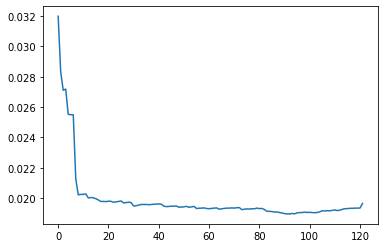

In [509]:
plt.plot(MSE)

In [510]:
M=MSE.index(min(MSE))
print('The M is:',M)

The M is: 92


In [511]:
pca=PCA(n_components=92)
pca.fit(scale(train_x))
train_x_pca=pca.fit_transform(scale(train_x))
test_x_pca =pca.transform(scale(test_x))

In [512]:
model5.fit(train_x_pca, train_y)

LinearRegression()

In [513]:
prediction_pca=model5.predict(test_x_pca)
MSE_PCA=mean_squared_error(test_y,prediction_pca)
MSE_PCA

0.01833828886837936

(j) In this section, we would like to fit a boosting tree to the data. As in classification
trees, one can use any type of regression at each node to build a multivariate
regression tree. Because the number of variables is large in this problem, one
can use L1-penalized regression at each node. Such a tree is called L1 penalized
gradient boosting tree. You can use XGBoost5
to fit the model tree. Determine
α (the regularization term) using cross-validation.

In [549]:
# https://www.cnblogs.com/TimVerion/p/11436001.html
# https://scikit-learn.org/stable/modules/model_evaluation.html
alphas2=[1e-3,1e-2,1e-1,1,1e+1,1e+2,1e+3]
model5=xgb.XGBRegressor(objective='reg:squarederror')
parameters={'reg_alpha':alphas2}
search=GridSearchCV(model5,param_grid=parameters,scoring='neg_mean_squared_error',cv=5)
search.fit(train_x,train_y)

/Users/yehaofu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/yehaofu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/yehaofu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/yehaofu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index i

/Users/yehaofu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/yehaofu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/yehaofu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/yehaofu/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index i

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [551]:
search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=1,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [552]:
print('The best alpha is: 1')

The best alpha is: 1
